<a href="https://colab.research.google.com/github/Morganblabla/Estadistica/blob/main/categorical_encoding(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paulina Morgan Jiménez
Estadística Inferencial II

Codificación de variables categóricas (categorical encoding)

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Morganblabla/Estadistica/refs/heads/main/StudentPerformanceFactors.csv')
df.dropna(inplace = True)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


# Hours_Studied

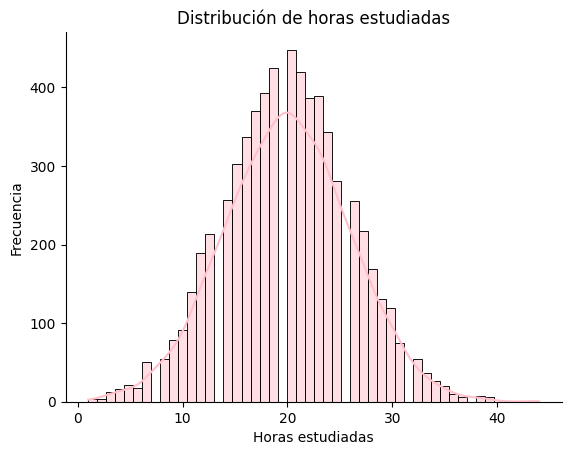

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Hours_Studied'], kde = True, color = 'pink')

plt.xlabel('Horas estudiadas')
plt.ylabel('Frecuencia')
plt.title('Distribución de horas estudiadas')

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# Attendance

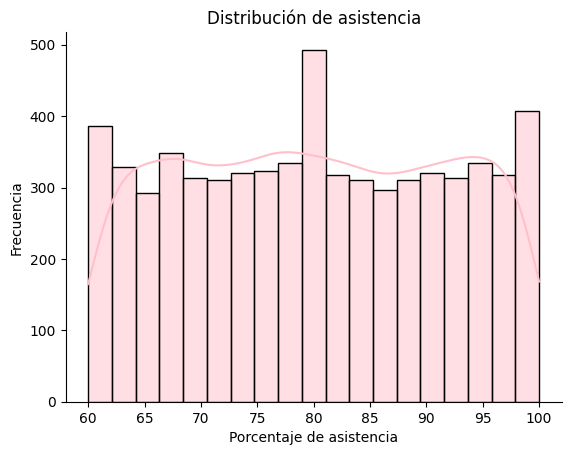

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Attendance'], kde = True, color = 'pink')

plt.xlabel('Porcentaje de asistencia')
plt.ylabel('Frecuencia')
plt.title('Distribución de asistencia')

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# Parental_Involvement

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Parental_Involvement)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo) #ANOVA de una vía
tabla_anova

#H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Parental_Involvement),2.0,2405.587354,1202.793677,80.462228,3.086485e-35
Residual,6375.0,95297.009071,14.948550,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  High    Low  -1.7334   0.0 -2.0626 -1.4042   True
  High Medium   -0.999   0.0 -1.2636 -0.7344   True
   Low Medium   0.7344   0.0  0.4363  1.0326   True
---------------------------------------------------


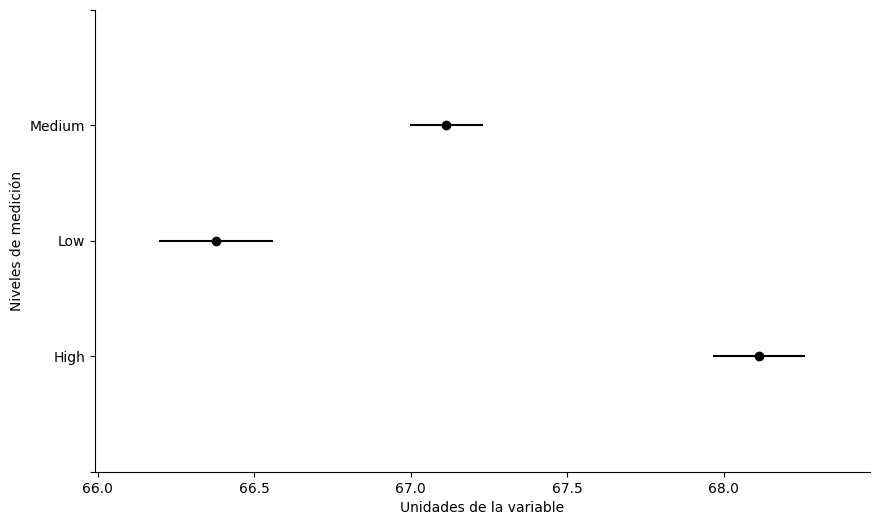

In [6]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Parental_Involvement'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Niveles de medición", xlabel = "Unidades de la variable")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.title("")
print(tukey)

In [7]:
niveles = {"Low": 0, "Medium": 50, "High": 100}
df['Parental_Involvement'] = df['Parental_Involvement'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,50,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,50,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,100,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,50,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,100,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


# Acces_to_Resources

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Access_to_Resources)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo) #ANOVA de una vía
tabla_anova

#H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Access_to_Resources),2.0,2752.911147,1376.455574,92.41636,2.722170e-40
Residual,6375.0,94949.685278,14.894068,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  High    Low  -1.8795   0.0 -2.2071 -1.5518   True
  High Medium  -0.9468   0.0 -1.2088 -0.6848   True
   Low Medium   0.9327   0.0   0.633  1.2323   True
---------------------------------------------------


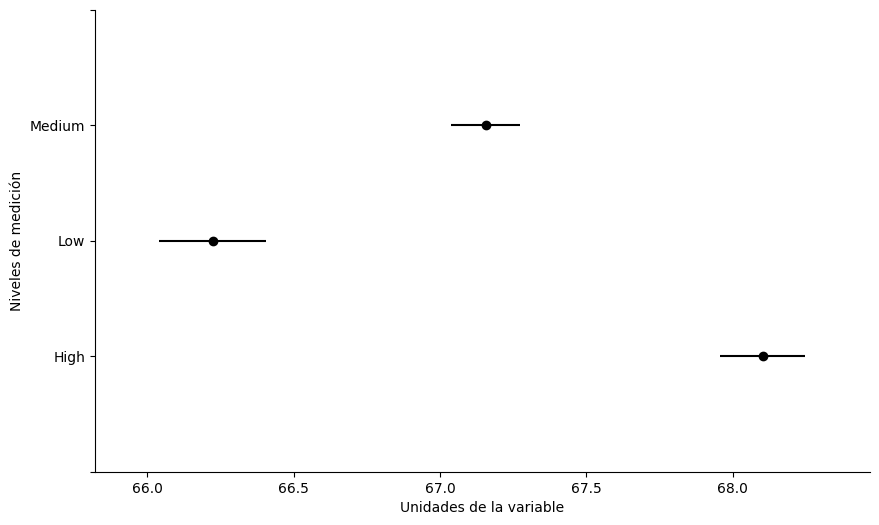

In [9]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Access_to_Resources'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Niveles de medición", xlabel = "Unidades de la variable")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.title("")
print(tukey)

In [10]:
niveles = {"Low": 0, "Medium": 50, "High": 100}
df['Access_to_Resources'] = df['Access_to_Resources'].map(niveles)
df
#¿Por qué elimina algunas columnas y otras no?

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,50,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,50,50,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,50,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,50,50,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,100,50,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,50,0,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,100,100,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


# Extracurricular_Activities

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Extracurricular_Activities)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo) #ANOVA de una vía
tabla_anova

#H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Extracurricular_Activities),1.0,388.552812,388.552812,25.457916,4.646554e-07
Residual,6376.0,97314.043614,15.262554,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    No    Yes   0.5032   0.0 0.3077 0.6987   True
-------------------------------------------------


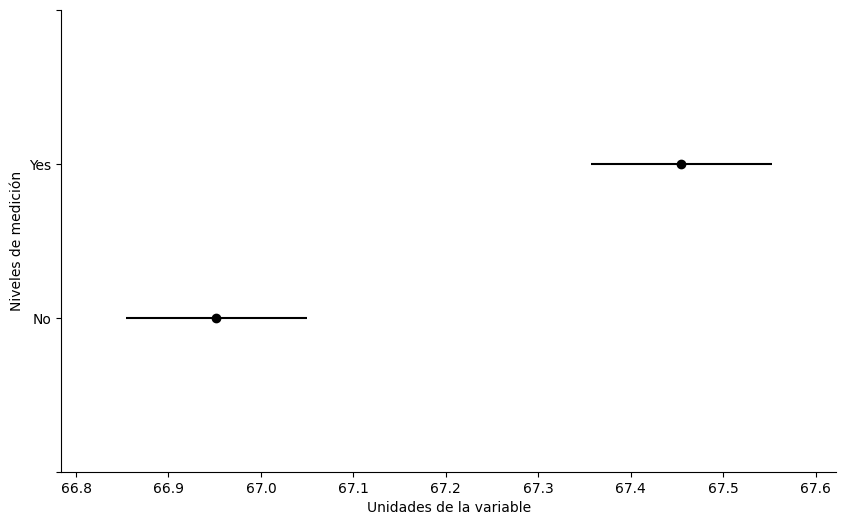

In [12]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Extracurricular_Activities'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Niveles de medición", xlabel = "Unidades de la variable")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.title("")
print(tukey)

In [13]:
niveles = {'No': 0, 'Yes':1}
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,50,0,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,50,50,1,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,50,1,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,50,50,1,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,100,50,0,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,50,0,1,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,100,100,1,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


# Sleep_Hours

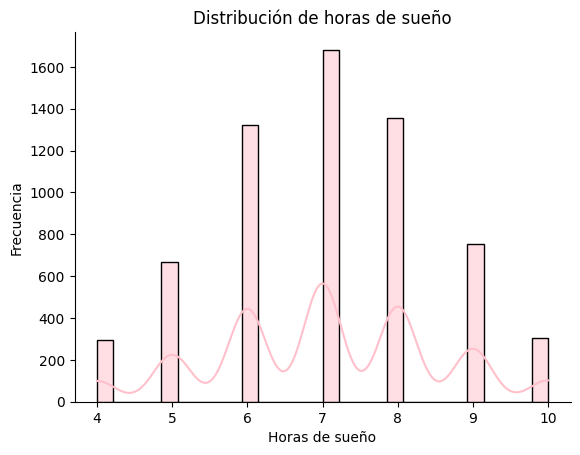

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Sleep_Hours'], kde = True, color = 'pink')

plt.xlabel('Horas de sueño')
plt.ylabel('Frecuencia')
plt.title('Distribución de horas de sueño')

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# Previous_Scores

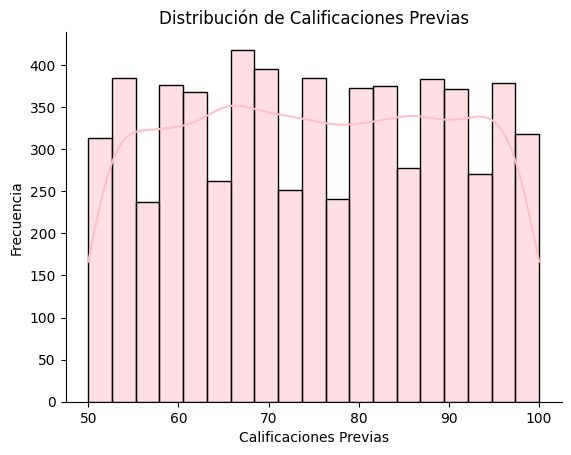

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Previous_Scores'], kde = True, color = 'pink')

plt.xlabel('Calificaciones Previas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Calificaciones Previas')

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# Motivation_Level

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Motivation_Level)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo) #ANOVA de una vía
tabla_anova

#H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Motivation_Level),2.0,776.488813,388.244407,25.535515,9.000204e-12
Residual,6375.0,96926.107612,15.204095,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  High    Low  -0.9794    0.0 -1.3115 -0.6474   True
  High Medium   -0.405 0.0048 -0.7071  -0.103   True
   Low Medium   0.5744    0.0  0.3086  0.8402   True
----------------------------------------------------


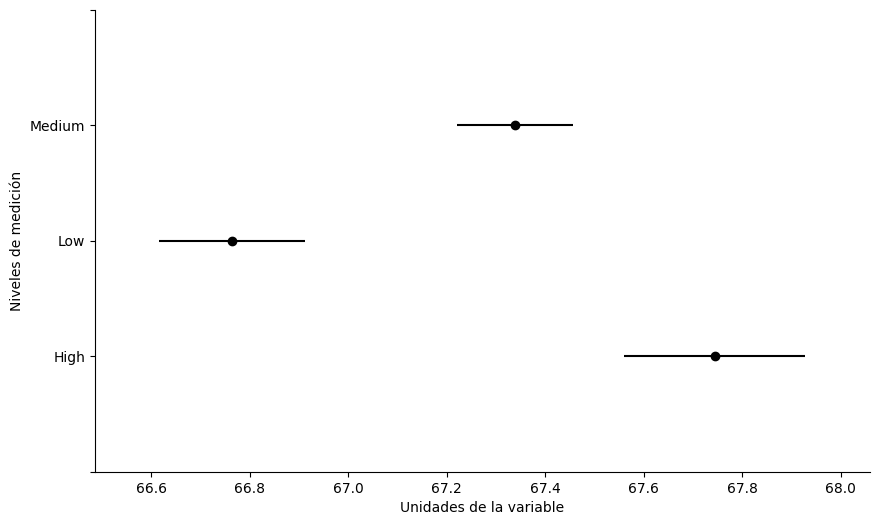

In [17]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Motivation_Level'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Niveles de medición", xlabel = "Unidades de la variable")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.title("")
print(tukey)

In [18]:
niveles = {"Low": 0, "Medium": 50, "High": 100}
df['Motivation_Level'] = df['Motivation_Level'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,0,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,50,0,8,59,0,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,50,50,1,7,91,50,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,50,1,8,98,50,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,50,50,1,6,65,50,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,100,50,0,8,81,50,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,50,0,1,6,65,0,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,100,100,1,6,91,100,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


# Internet_Access

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Internet_Access)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo) #ANOVA de una vía
tabla_anova

#H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Internet_Access),1.0,255.358422,255.358422,16.708173,0.000044
Residual,6376.0,97447.238003,15.283444,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    No    Yes   0.7549   0.0 0.3929 1.1169   True
-------------------------------------------------


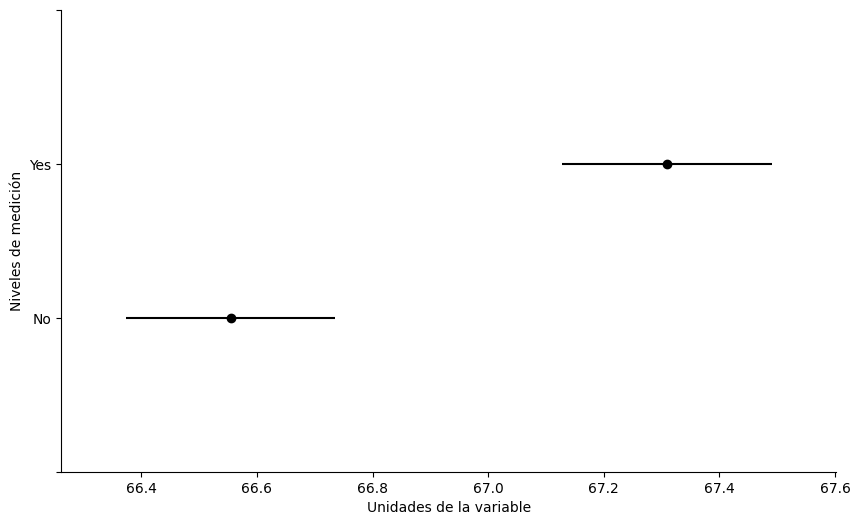

In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Internet_Access'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Niveles de medición", xlabel = "Unidades de la variable")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.title("")
print(tukey)

In [21]:
niveles = {'No': 0, 'Yes':1}
df['Internet_Access'] = df['Internet_Access'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,0,1,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,50,0,8,59,0,1,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,50,50,1,7,91,50,1,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,50,1,8,98,50,1,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,50,50,1,6,65,50,1,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,1,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,100,50,0,8,81,50,1,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,50,0,1,6,65,0,1,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,100,100,1,6,91,100,1,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


# Tutoring_Sessions

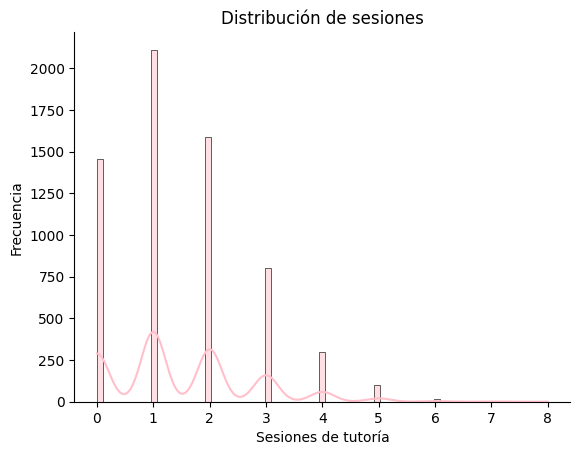

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Tutoring_Sessions'], kde = True, color = 'pink')

plt.xlabel('Sesiones de tutoría')
plt.ylabel('Frecuencia')
plt.title('Distribución de sesiones')

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# Family_Income

In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Family_Income)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo) #ANOVA de una vía
tabla_anova

#H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Family_Income),2.0,874.339934,437.169967,28.782492,3.597672e-13
Residual,6375.0,96828.256491,15.188746,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  High    Low  -0.9882    0.0 -1.3048 -0.6717   True
  High Medium  -0.4705 0.0015 -0.7873 -0.1536   True
   Low Medium   0.5178    0.0  0.2631  0.7725   True
----------------------------------------------------


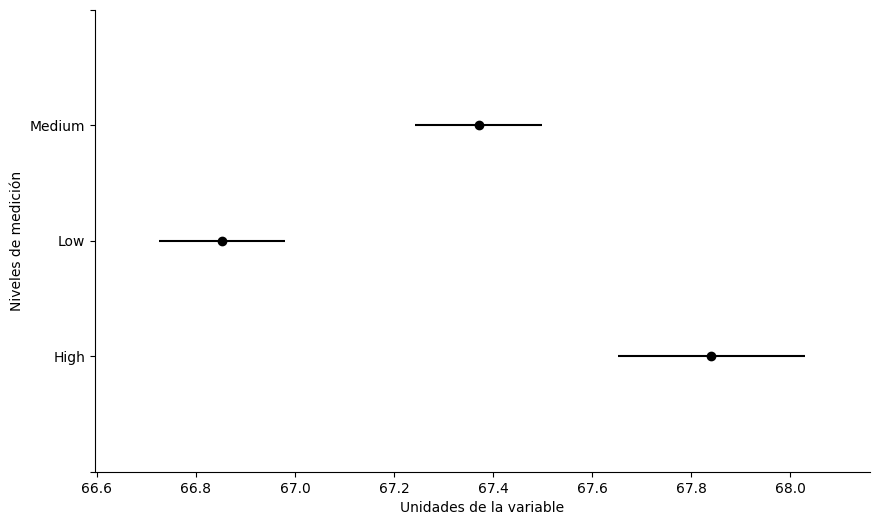

In [24]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Family_Income'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Niveles de medición", xlabel = "Unidades de la variable")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.title("")
print(tukey)

In [25]:
niveles = {"Low": 0, "Medium": 50, "High": 100}
df['Family_Income'] = df['Family_Income'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,0,1,0,0,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,50,0,8,59,0,1,2,50,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,50,50,1,7,91,50,1,2,50,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,50,1,8,98,50,1,1,50,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,50,50,1,6,65,50,1,3,50,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,1,1,100,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,100,50,0,8,81,50,1,3,0,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,50,0,1,6,65,0,1,3,0,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,100,100,1,6,91,100,1,2,0,Medium,Private,Positive,3,No,High School,Far,Female,68


# Teacher_Quality

In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Teacher_Quality)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo) #ANOVA de una vía
tabla_anova

#H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Teacher_Quality),2.0,566.739816,283.369908,18.59749,8.844704e-09
Residual,6375.0,97135.856609,15.236997,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  High    Low   -0.906    0.0 -1.3224 -0.4896   True
  High Medium  -0.5632    0.0 -0.8198 -0.3066   True
   Low Medium   0.3428 0.0971 -0.0462  0.7318  False
----------------------------------------------------


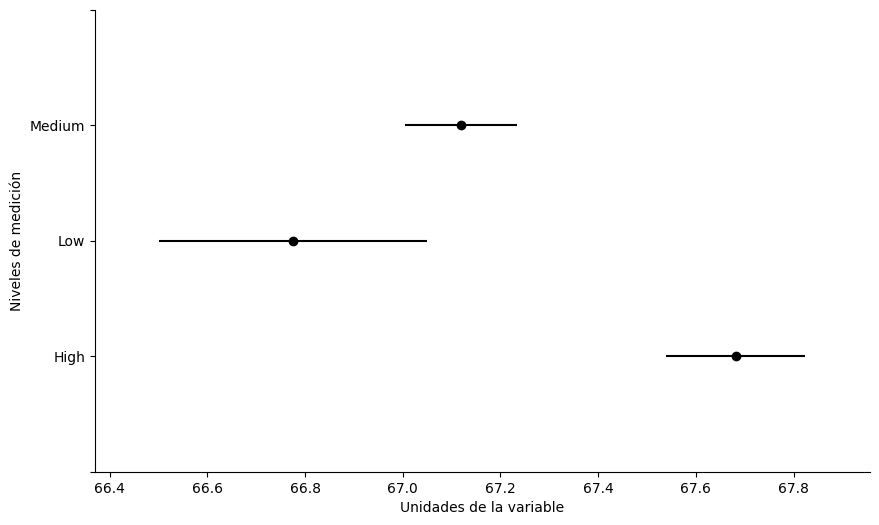

In [27]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Teacher_Quality'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Niveles de medición", xlabel = "Unidades de la variable")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.title("")
print(tukey)

In [28]:
niveles = {"Low": 0, "Medium": 0, "High": 1}
df['Teacher_Quality'] = df['Teacher_Quality'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,0,1,0,0,0,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,50,0,8,59,0,1,2,50,0,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,50,50,1,7,91,50,1,2,50,0,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,50,1,8,98,50,1,1,50,0,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,50,50,1,6,65,50,1,3,50,1,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,1,1,100,0,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,100,50,0,8,81,50,1,3,0,1,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,50,0,1,6,65,0,1,3,0,0,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,100,100,1,6,91,100,1,2,0,0,Private,Positive,3,No,High School,Far,Female,68


# School_Type

In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(School_Type)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo) #ANOVA de una vía
tabla_anova

#H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(School_Type),1.0,11.540237,11.540237,0.753196,0.385499
Residual,6376.0,97691.056188,15.321684,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj   lower  upper  reject
----------------------------------------------------
Private Public  -0.0924 0.3855 -0.3011 0.1163  False
----------------------------------------------------


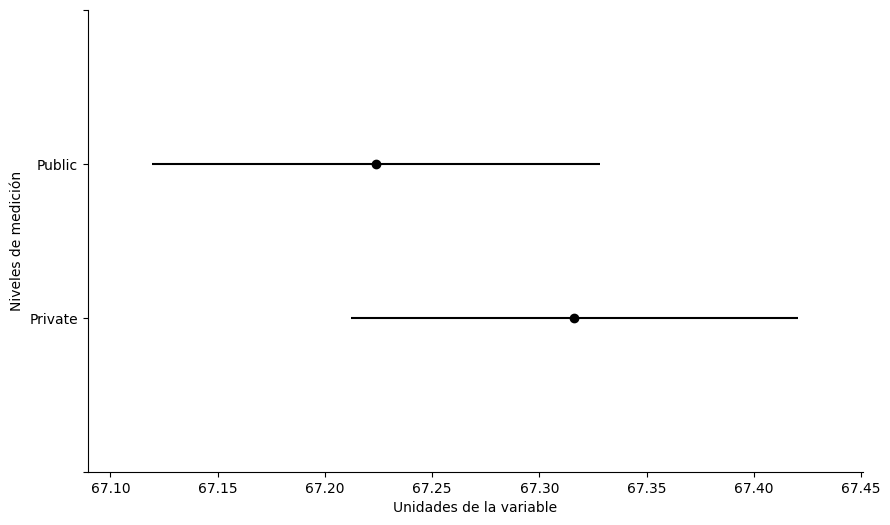

In [30]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['School_Type'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Niveles de medición", xlabel = "Unidades de la variable")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.title("")
print(tukey)

In [31]:
df.drop(columns = ["School_Type"], inplace = True)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,0,1,0,0,0,Positive,3,No,High School,Near,Male,67
1,19,64,0,50,0,8,59,0,1,2,50,0,Negative,4,No,College,Moderate,Female,61
2,24,98,50,50,1,7,91,50,1,2,50,0,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,50,1,8,98,50,1,1,50,0,Negative,4,No,High School,Moderate,Male,71
4,19,92,50,50,1,6,65,50,1,3,50,1,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,1,1,100,0,Positive,2,No,High School,Near,Female,68
6603,23,76,100,50,0,8,81,50,1,3,0,1,Positive,2,No,High School,Near,Female,69
6604,20,90,50,0,1,6,65,0,1,3,0,0,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,100,100,1,6,91,100,1,2,0,0,Positive,3,No,High School,Far,Female,68


# Peer_Influence

In [32]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Peer_Influence)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo) #ANOVA de una vía
tabla_anova

#H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Peer_Influence),2.0,976.526155,488.263077,32.180333,1.242613e-14
Residual,6375.0,96726.070271,15.172717,NaN,NaN


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower  upper  reject
------------------------------------------------------
Negative  Neutral   0.6329    0.0 0.3229 0.9429   True
Negative Positive   1.0538    0.0  0.745 1.3626   True
 Neutral Positive   0.4209 0.0004 0.1638 0.6779   True
------------------------------------------------------


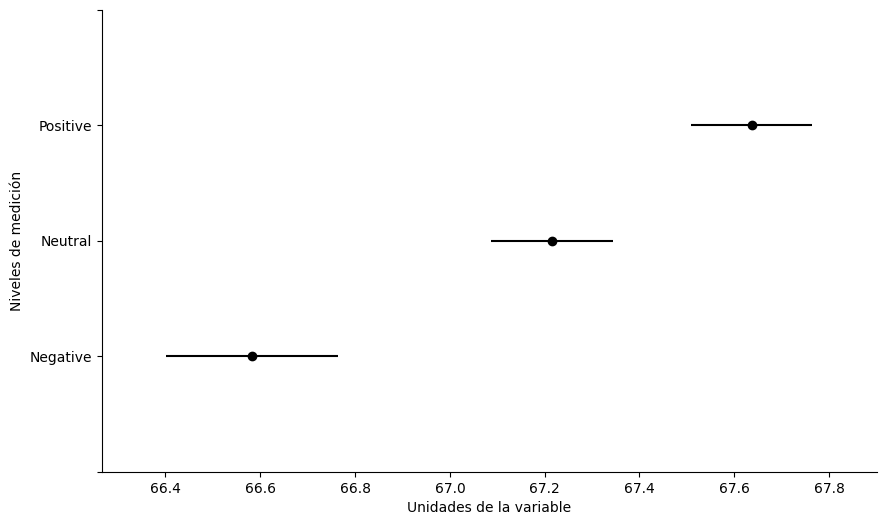

In [33]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Peer_Influence'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Niveles de medición", xlabel = "Unidades de la variable")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.title("")
print(tukey)

In [34]:
niveles = {"Positive": 0, "Neutral": 50, "Negative": 100}
df['Peer_Influence'] = df['Peer_Influence'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,0,1,0,0,0,0,3,No,High School,Near,Male,67
1,19,64,0,50,0,8,59,0,1,2,50,0,100,4,No,College,Moderate,Female,61
2,24,98,50,50,1,7,91,50,1,2,50,0,50,4,No,Postgraduate,Near,Male,74
3,29,89,0,50,1,8,98,50,1,1,50,0,100,4,No,High School,Moderate,Male,71
4,19,92,50,50,1,6,65,50,1,3,50,1,50,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,1,1,100,0,0,2,No,High School,Near,Female,68
6603,23,76,100,50,0,8,81,50,1,3,0,1,0,2,No,High School,Near,Female,69
6604,20,90,50,0,1,6,65,0,1,3,0,0,100,2,No,Postgraduate,Near,Female,68
6605,10,86,100,100,1,6,91,100,1,2,0,0,0,3,No,High School,Far,Female,68


# Physical_Activity

In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Physical_Activity)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo) #ANOVA de una vía
tabla_anova

#H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Physical_Activity),6.0,112.212035,18.702006,1.220924,0.291952
Residual,6371.0,97590.384390,15.317907,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.6082 0.9587 -2.4415 1.2252  False
     0      2  -0.3415 0.9976  -2.106 1.4229  False
     0      3  -0.3605 0.9967 -2.1161 1.3952  False
     0      4  -0.2385 0.9997 -2.0035 1.5264  False
     0      5  -0.0162    1.0 -1.8636 1.8313  False
     0      6   0.6254 0.9936 -2.0813  3.332  False
     1      2   0.2666 0.8883 -0.3802 0.9135  False
     1      3   0.2477  0.904 -0.3746   0.87  False
     1      4   0.3696 0.6279 -0.2784 1.0176  False
     1      5    0.592 0.3767 -0.2554 1.4395  False
     1      6   1.2335 0.6225 -0.9184 3.3855  False
     2      3  -0.0189    1.0 -0.3924 0.3545  False
     2      4    0.103 0.9906 -0.3118 0.5179  False
     2      5   0.3254 0.8025 -0.3605 1.0112  False
     2      6   0.9669  0.822 -1.1267 3.0605  False
     3      4   0.1219 0.9628 -0.2535 0.4974  False
     3      

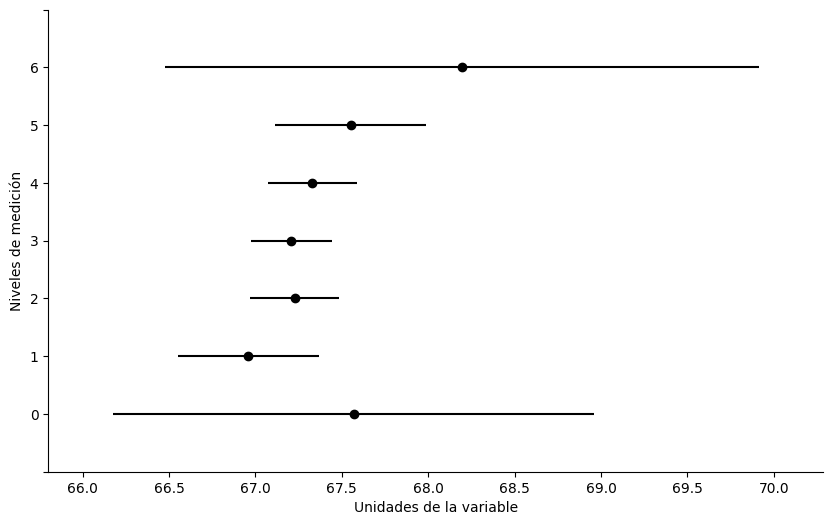

In [36]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Physical_Activity'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Niveles de medición", xlabel = "Unidades de la variable")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.title("")
print(tukey)

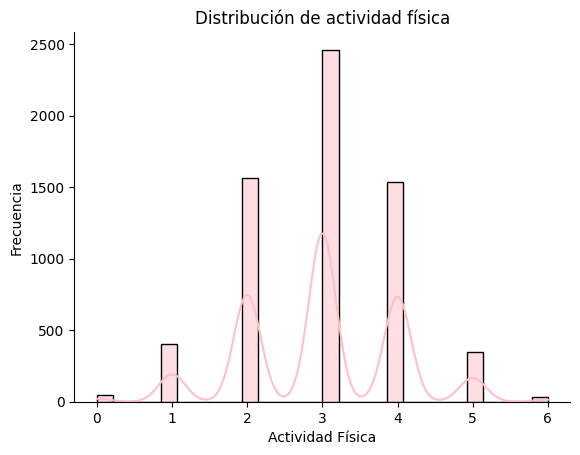

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Physical_Activity'], kde = True, color = 'pink')

plt.xlabel('Actividad Física')
plt.ylabel('Frecuencia')
plt.title('Distribución de actividad física')

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# Learning_Disabilities

In [38]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Learning_Disabilities)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo) #ANOVA de una vía
tabla_anova

#H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Learning_Disabilities),1.0,687.937066,687.937066,45.212618,1.921126e-11
Residual,6376.0,97014.659360,15.215599,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    No    Yes  -1.0725   0.0 -1.3852 -0.7598   True
---------------------------------------------------


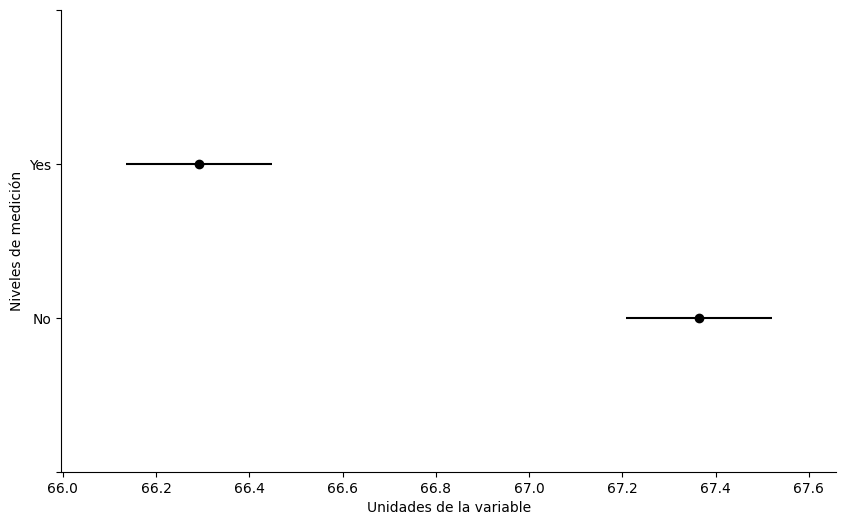

In [39]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Learning_Disabilities'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Niveles de medición", xlabel = "Unidades de la variable")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.title("")
print(tukey)

In [40]:
niveles = {"Yes": 0, "No": 50}
df['Learning_Disabilities'] = df['Learning_Disabilities'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,0,1,0,0,0,0,3,50,High School,Near,Male,67
1,19,64,0,50,0,8,59,0,1,2,50,0,100,4,50,College,Moderate,Female,61
2,24,98,50,50,1,7,91,50,1,2,50,0,50,4,50,Postgraduate,Near,Male,74
3,29,89,0,50,1,8,98,50,1,1,50,0,100,4,50,High School,Moderate,Male,71
4,19,92,50,50,1,6,65,50,1,3,50,1,50,4,50,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,1,1,100,0,0,2,50,High School,Near,Female,68
6603,23,76,100,50,0,8,81,50,1,3,0,1,0,2,50,High School,Near,Female,69
6604,20,90,50,0,1,6,65,0,1,3,0,0,100,2,50,Postgraduate,Near,Female,68
6605,10,86,100,100,1,6,91,100,1,2,0,0,0,3,50,High School,Far,Female,68


# Parental_Education_Level

In [41]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Parental_Education_Level)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo) #ANOVA de una vía
tabla_anova

#H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Parental_Education_Level),2.0,1089.555877,544.777939,35.947108,2.990498e-16
Residual,6375.0,96613.040548,15.154987,NaN,NaN


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2    meandiff p-adj   lower   upper  reject
---------------------------------------------------------------
    College  High School  -0.4635 0.0001 -0.7268 -0.2002   True
    College Postgraduate   0.6142    0.0  0.2856  0.9429   True
High School Postgraduate   1.0778    0.0  0.7754  1.3801   True
---------------------------------------------------------------


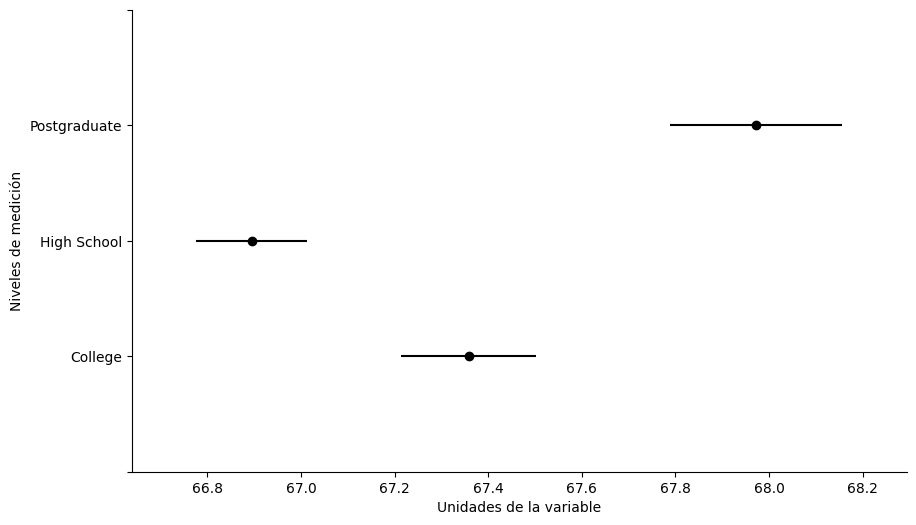

In [42]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Parental_Education_Level'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Niveles de medición", xlabel = "Unidades de la variable")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.title("")
print(tukey)

In [43]:
niveles = {"Postgraduate": 0, "High School": 50, "College": 100}
df['Parental_Education_Level'] = df['Parental_Education_Level'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,0,1,0,0,0,0,3,50,50,Near,Male,67
1,19,64,0,50,0,8,59,0,1,2,50,0,100,4,50,100,Moderate,Female,61
2,24,98,50,50,1,7,91,50,1,2,50,0,50,4,50,0,Near,Male,74
3,29,89,0,50,1,8,98,50,1,1,50,0,100,4,50,50,Moderate,Male,71
4,19,92,50,50,1,6,65,50,1,3,50,1,50,4,50,100,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,1,1,100,0,0,2,50,50,Near,Female,68
6603,23,76,100,50,0,8,81,50,1,3,0,1,0,2,50,50,Near,Female,69
6604,20,90,50,0,1,6,65,0,1,3,0,0,100,2,50,0,Near,Female,68
6605,10,86,100,100,1,6,91,100,1,2,0,0,0,3,50,50,Far,Female,68


# Distance_from_Home

In [44]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Distance_from_Home)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo) #ANOVA de una vía
tabla_anova

#H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Distance_from_Home),2.0,758.421410,379.210705,24.936704,1.630308e-11
Residual,6375.0,96944.175015,15.206929,NaN,NaN


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1   group2  meandiff p-adj lower  upper  reject
-----------------------------------------------------
     Far Moderate   0.4882 0.017 0.0705 0.9059   True
     Far     Near   1.0154   0.0 0.6237  1.407   True
Moderate     Near   0.5272   0.0 0.2722 0.7822   True
-----------------------------------------------------


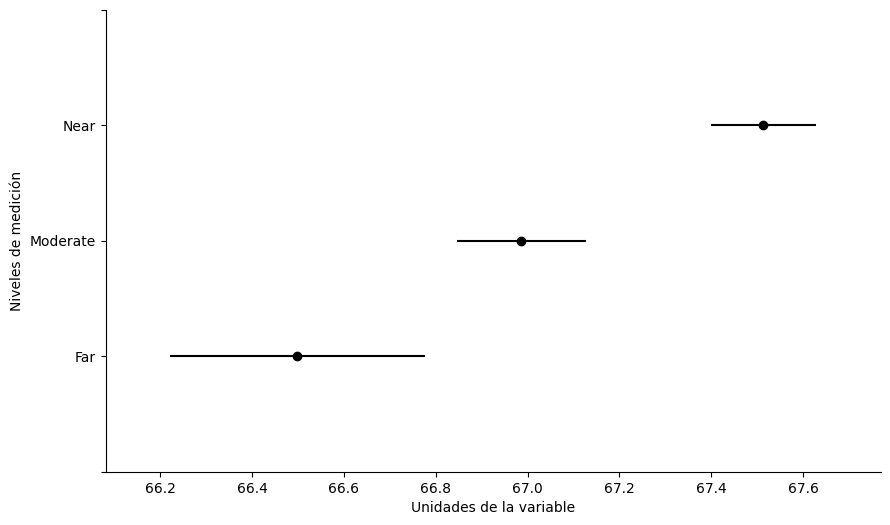

In [45]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Distance_from_Home'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Niveles de medición", xlabel = "Unidades de la variable")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.title("")
print(tukey)

In [46]:
niveles = {"Near": 0, "Moderate": 50, "Far": 100}
df['Distance_from_Home'] = df['Distance_from_Home'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,0,1,0,0,0,0,3,50,50,0,Male,67
1,19,64,0,50,0,8,59,0,1,2,50,0,100,4,50,100,50,Female,61
2,24,98,50,50,1,7,91,50,1,2,50,0,50,4,50,0,0,Male,74
3,29,89,0,50,1,8,98,50,1,1,50,0,100,4,50,50,50,Male,71
4,19,92,50,50,1,6,65,50,1,3,50,1,50,4,50,100,0,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,1,1,100,0,0,2,50,50,0,Female,68
6603,23,76,100,50,0,8,81,50,1,3,0,1,0,2,50,50,0,Female,69
6604,20,90,50,0,1,6,65,0,1,3,0,0,100,2,50,0,0,Female,68
6605,10,86,100,100,1,6,91,100,1,2,0,0,0,3,50,50,100,Female,68


# Gender

In [47]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Gender)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo) #ANOVA de una vía
tabla_anova

#H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Gender),1.0,2.377044,2.377044,0.155128,0.693696
Residual,6376.0,97700.219381,15.323121,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
Female   Male  -0.0391 0.6937 -0.2337 0.1555  False
---------------------------------------------------


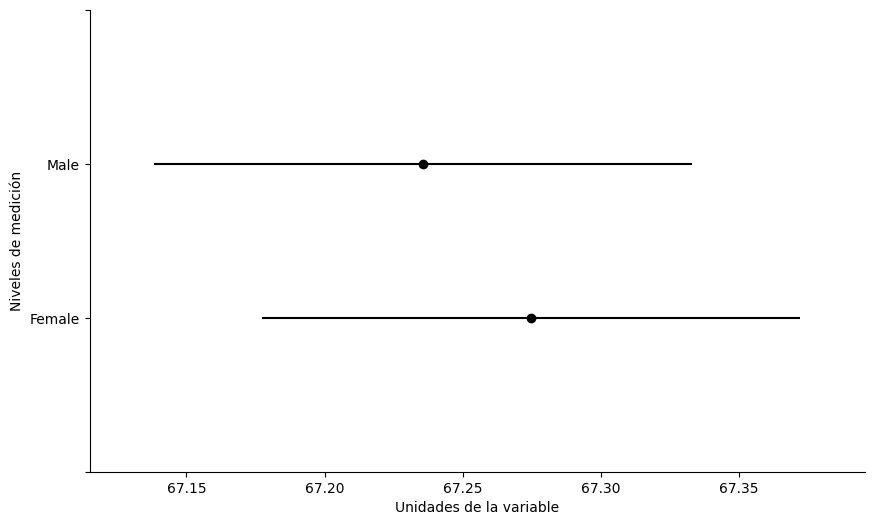

In [48]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Gender'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Niveles de medición", xlabel = "Unidades de la variable")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.title("")
print(tukey)

In [49]:
niveles = {"Male": 0, "Female": 1}
df['Gender'] = df['Gender'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,0,1,0,0,0,0,3,50,50,0,0,67
1,19,64,0,50,0,8,59,0,1,2,50,0,100,4,50,100,50,1,61
2,24,98,50,50,1,7,91,50,1,2,50,0,50,4,50,0,0,0,74
3,29,89,0,50,1,8,98,50,1,1,50,0,100,4,50,50,50,0,71
4,19,92,50,50,1,6,65,50,1,3,50,1,50,4,50,100,0,1,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,1,1,100,0,0,2,50,50,0,1,68
6603,23,76,100,50,0,8,81,50,1,3,0,1,0,2,50,50,0,1,69
6604,20,90,50,0,1,6,65,0,1,3,0,0,100,2,50,0,0,1,68
6605,10,86,100,100,1,6,91,100,1,2,0,0,0,3,50,50,100,1,68


# Exam_Score

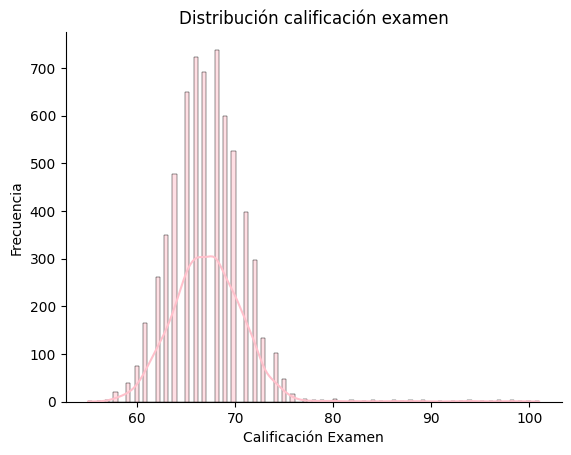

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Exam_Score'], kde = True, color = 'pink')

plt.xlabel('Calificación Examen')
plt.ylabel('Frecuencia')
plt.title('Distribución calificación examen')

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# Mapa de calor

<Axes: >

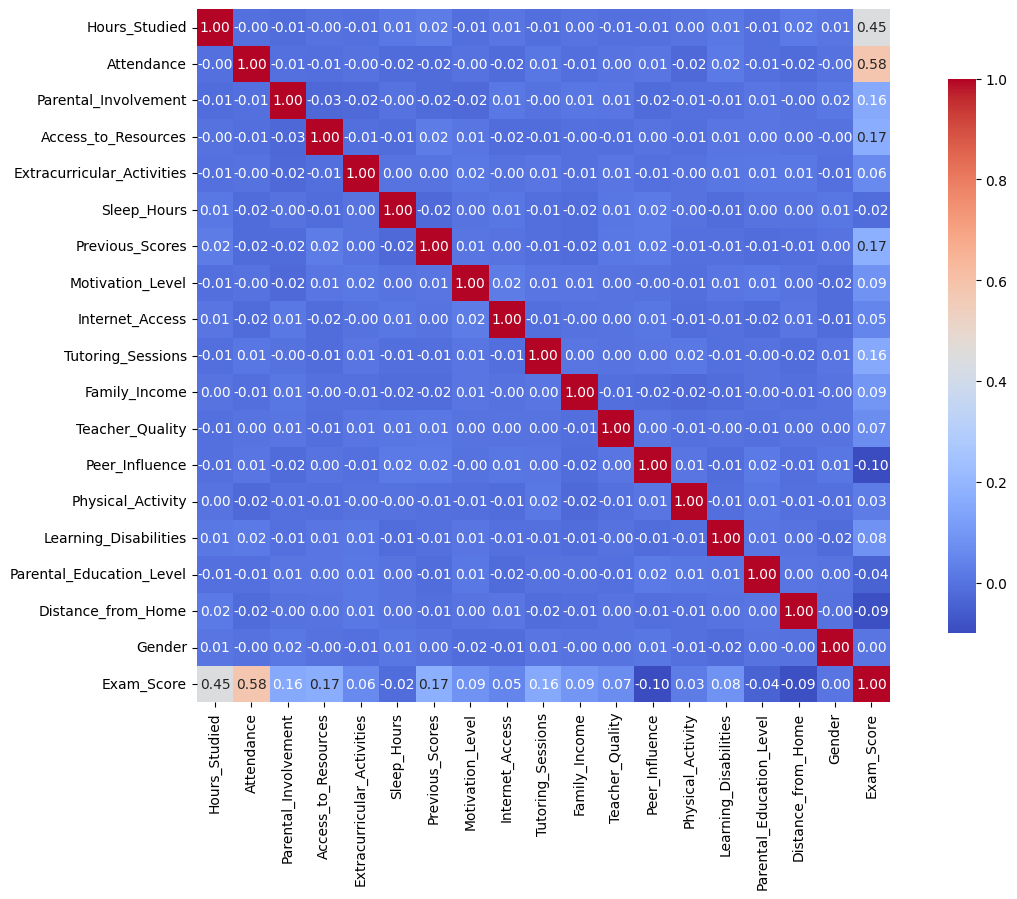

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

matriz_de_correlacion = df.corr()
plt.figure(figsize = (15, 9))
sns.heatmap(matriz_de_correlacion, annot = True, cmap = 'coolwarm', fmt = "0.2f", square = True, cbar_kws = {"shrink": 0.8})

Coeficiente de determinaión: 0.6860


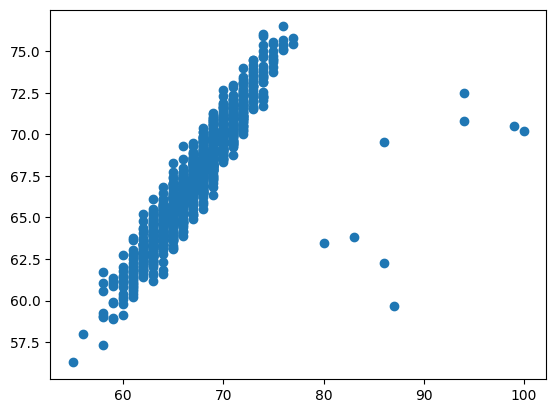

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = df[["Hours_Studied", "Attendance", "Parental_Involvement", "Access_to_Resources", "Previous_Scores", "Tutoring_Sessions", "Peer_Influence", "Parental_Education_Level"]]
Y = df["Exam_Score"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

X_train_constante = sm.add_constant(X_train)
X_test_constante = sm.add_constant(X_test)

modelo = sm.OLS(Y_train, X_train_constante).fit()
predicciones = modelo.predict(X_test_constante)

Yc = modelo.predict(X_test_constante)
plt.scatter(Y_test, Yc)

r2 = r2_score(Y_test, Yc)
print(f"Coeficiente de determinaión:{r2: 0.4f}")

In [53]:
b0, b1, b2, b3, b4, b5, b6, b7, b8 = modelo.params

fun = lambda x1, x2, x3, x4, x5, x6, x7, x8: b0 + b1*x1 + b2*x2 + b3*x3 + b4*x4 + b5*x5 + b6*x6 + b7*x7 + b8*x8
fun(15, 50, 50, 50, 70, 2, 0, 2)

60.25053253541071

In [54]:
from statsmodels.stats.api import het_breuschpagan

_, valor_p_bp, _, _ = het_breuschpagan(modelo.resid, X_train_constante)
print(f"valor-p de Breusch-Pagan {valor_p_bp: 0.4f}")

valor-p de Breusch-Pagan  0.9847


In [55]:
from statsmodels.formula.api import ols
modelo_2 = ols("Exam_Score ~ Hours_Studied+Attendance+Parental_Involvement+Access_to_Resources+Previous_Scores+Tutoring_Sessions+Peer_Influence+Parental_Education_Level", data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_2, typ = 2)
print(tabla_anova)
tabla_anova

                                sum_sq      df            F         PR(>F)
Hours_Studied             19573.872222     1.0  3811.778165   0.000000e+00
Attendance                33735.496721     1.0  6569.585635   0.000000e+00
Parental_Involvement       2995.524792     1.0   583.342727  2.164816e-123
Access_to_Resources        3171.394639     1.0   617.591282  3.372048e-130
Previous_Scores            3082.742682     1.0   600.327371  9.018838e-127
Tutoring_Sessions          2501.119507     1.0   487.063194  4.548820e-104
Peer_Influence              969.977003     1.0   188.891453   2.223902e-42
Parental_Education_Level     87.813893     1.0    17.100708   3.590476e-05
Residual                  32705.468892  6369.0          NaN            NaN


,sum_sq,df,F,PR(>F)
Hours_Studied,19573.872222,1.0,3811.778165,0.000000e+00
Attendance,33735.496721,1.0,6569.585635,0.000000e+00
Parental_Involvement,2995.524792,1.0,583.342727,2.164816e-123
Access_to_Resources,3171.394639,1.0,617.591282,3.372048e-130
Previous_Scores,3082.742682,1.0,600.327371,9.018838e-127
Tutoring_Sessions,2501.119507,1.0,487.063194,4.548820e-104
Peer_Influence,969.977003,1.0,188.891453,2.223902e-42
Parental_Education_Level,87.813893,1.0,17.100708,3.590476e-05
Residual,32705.468892,6369.0,NaN,NaN


In [56]:
'''
'Hours_Studied', Distribución normal, no se aprecian datos atípicos

'Attendance', Distribución uniforme, no se aprecian datos atípicos

'Parental_Involvement', Niveles de medición Low: 0, Medium: 50, High: 100
Según aumenta la participación parental, aumenta la nota del examen

'Access_to_Resources', Niveles de medición Low: 0, Medium: 50, High: 100
Según aumenta el acceso a los recursos, aumenta la nota del examen

'Extracurricular_Activities', Niveles de medición no: 0, Yes: 1
Según aumenta la participación en actividades extraescolares, aumenta la nota del examen

'Sleep_Hours', Distribución aproximadamente normal, variable discreta
no se aprecian variables atítipicas

'Previous_Scores', Distribución normal, no se aprecian datos atípicos

'Motivation_Level', Niveles de medición Low: 0, Medium: 50, High: 100
  Según aumenta la Motivation, aumenta la nota del examen

'Internet_Access', Niveles de medición no: 0, Yes: 1
  Según aumenta el acceso a internet, aumenta la nota del examen

'Tutoring_Sessions', Distribución uniforme, no se aprecian datos atípicos

'Family_Income', Niveles de medición Low: 0, Medium: 50, High: 100
  Según aumenta el ingreso familiar, aumenta la nota del examen

'Teacher_Quality', Niveles de medición Low-Medium: 0, High: 1
  Según aumenta la calidad del profesor, aumenta la nota del examen

'School_Type', No  hay diferencia significativa entre los grupos

'Peer_Influence', Se observa una relación positiva entre la influencia entre pares
  y la nota del examen

'Physical_Activity', Distribución aproximadamente normal, variable discreta
  no se aprecian variables atítipicas

'Learning_Disabilities', Dos niveles de medición, No: 0, Yes: 50
  Según aumenta la presencia de discapacidades, aumenta la nota del examen

'Parental_Education_Level', Niveles de medición Post-graduate: 0, High School: 50, College: 100
  Según aumenta el nivel educativo de los padres, aumenta la nota del examen

'Distance_from_Home', Niveles de medición Near: 0, Moderate: 50, Far: 100
  Según aumenta la distancia de casa, aumenta la nota del examen

'Gender', No hay diferencia significativa entre los grupos

'Exam_Score', Distribución normal, no se aprecian datos atípicos

'''

"\n'Hours_Studied', Distribución normal, no se aprecian datos atípicos\n\n'Attendance', Distribución uniforme, no se aprecian datos atípicos\n\n'Parental_Involvement', Niveles de medición Low: 0, Medium: 50, High: 100\nSegún aumenta la participación parental, aumenta la nota del examen\n\n'Access_to_Resources', Niveles de medición Low: 0, Medium: 50, High: 100\nSegún aumenta el acceso a los recursos, aumenta la nota del examen\n\n'Extracurricular_Activities', Niveles de medición no: 0, Yes: 1\nSegún aumenta la participación en actividades extraescolares, aumenta la nota del examen\n\n'Sleep_Hours', Distribución aproximadamente normal, variable discreta\nno se aprecian variables atítipicas\n\n'Previous_Scores', Distribución normal, no se aprecian datos atípicos\n\n'Motivation_Level', Niveles de medición Low: 0, Medium: 50, High: 100\n  Según aumenta la Motivation, aumenta la nota del examen\n\n'Internet_Access', Niveles de medición no: 0, Yes: 1\n  Según aumenta el acceso a internet, au

# Regresión Líneal Múltiple

a) Mapa de calor para identificar las variables más correlacionadas con "Exam_Score".

<Axes: >

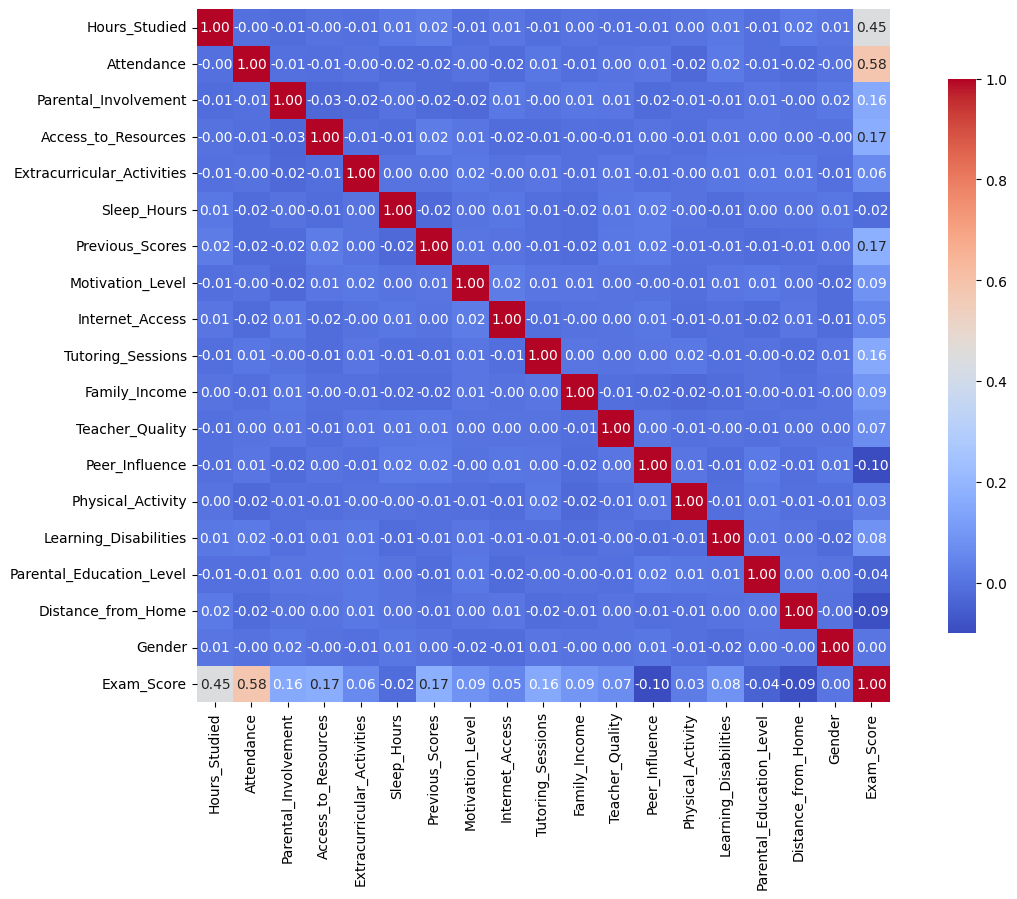

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

matriz_de_correlacion = df.corr()
plt.figure(figsize = (15, 9))
sns.heatmap(matriz_de_correlacion, annot = True, cmap = 'coolwarm', fmt = "0.2f", square = True, cbar_kws = {"shrink": 0.8})

b) Separa los datos en dos grupos, entrenamiento y prueba. Realiza la correlación múltiple en los datos de entrenamiento.

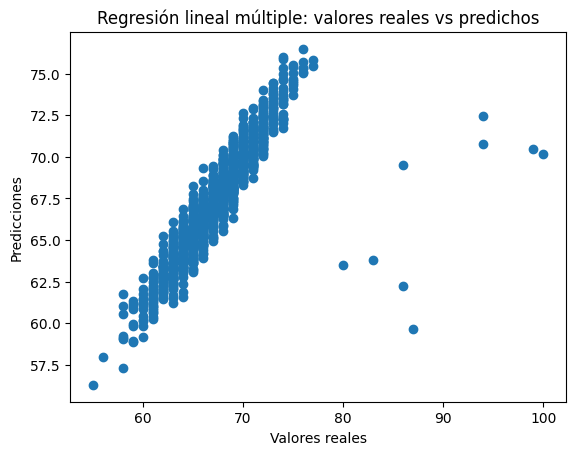

Coeficiente de determinación: 0.6860


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# Definir variables correctamente
X = df[["Hours_Studied", "Attendance", "Parental_Involvement", "Access_to_Resources",
        "Previous_Scores", "Tutoring_Sessions", "Peer_Influence", "Parental_Education_Level"]]
y = df["Exam_Score"]

# Separar en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Agregar constante para la regresión
X_train_constante = sm.add_constant(X_train)
X_test_constante = sm.add_constant(X_test)

# Ajustar modelo de regresión
modelo = sm.OLS(y_train, X_train_constante).fit()

# Predicción
y_pred = modelo.predict(X_test_constante)

# Gráfico de predicción vs valores reales
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Regresión lineal múltiple: valores reales vs predichos")
plt.show()

# Calcular coeficiente de determinación R²
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación: {r2:.4f}")

In [71]:
from statsmodels.stats.api import het_breuschpagan

_, valor_p_bp, _, _ = het_breuschpagan(modelo.resid, X_train_constante)
print(f"Valor-p de Breushc-Pagan{valor_p_bp:0.4f}")

Valor-p de Breushc-Pagan0.9847


c) Calcula el coeficiente de correlación e interprétalo.

In [74]:
import numpy as np

# Calcular el coeficiente de correlación (Pearson)
r = np.sqrt(r2) if modelo.params[1] > 0 else -np.sqrt(r2)

print(f"Coeficiente de correlación: {r:.4f}")

Coeficiente de correlación: 0.8283


<ipython-input-74-7f5d1b4913a2>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  r = np.sqrt(r2) if modelo.params[1] > 0 else -np.sqrt(r2)


Relación fuerte entre las variables

d) Realiza la tabla anova para regresión múltiple e interpreta los resultados.

In [73]:
from statsmodels.formula.api import ols
modelo_2 = ols("Exam_Score ~ Hours_Studied+Attendance+Parental_Involvement+Access_to_Resources+Previous_Scores+Tutoring_Sessions+Peer_Influence+Parental_Education_Level", data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_2, typ = 2)
tabla_anova

,sum_sq,df,F,PR(>F)
Hours_Studied,19573.872222,1.0,3811.778165,0.000000e+00
Attendance,33735.496721,1.0,6569.585635,0.000000e+00
Parental_Involvement,2995.524792,1.0,583.342727,2.164816e-123
Access_to_Resources,3171.394639,1.0,617.591282,3.372048e-130
Previous_Scores,3082.742682,1.0,600.327371,9.018838e-127
Tutoring_Sessions,2501.119507,1.0,487.063194,4.548820e-104
Peer_Influence,969.977003,1.0,188.891453,2.223902e-42
Parental_Education_Level,87.813893,1.0,17.100708,3.590476e-05
Residual,32705.468892,6369.0,NaN,NaN


Interpretación: con un valor F tan alto podemos decir que más fuerte es la evidencia de que la variable tiene un efecto significativo en la variable dependiente.

e) Extrae la ecuación de regresión múltiple y aplícala en un ejemplo propuesto por ti.

In [75]:
b0,b1,b2,b3,b4,b5,b6,b7,b8=modelo.params
fun = lambda x1,x2,x3,x4,x5,x6,x7,x8: b0+b1*x1+b2*x2+b3*x3+b4*x4+b5*x5+b6*x6+b7*x7+b8*x8
fun(15, 50, 50, 50, 70, 2, 0, 2)

60.25053253541071